In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from citipy import citipy
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Google API Key
from config import (gkey,weather_api_key)


## Generate Cities List

In [2]:
# Generate a list of latitudes (lat) and longitudes (lng) by random choosing.
lat= np.random.uniform(-90, 90, 1500)
lng= np.random.uniform(-180, 180, 1500)

# Create a new list of lat-lng combinations)
lat_lng = list(zip(lat,lng))

# Create an empty list to store city names
city_list = []

# Generate a set of unique city names based on lat lng list. 
for coordinate in lat_lng:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in city_list:
        city_list.append(city)

# Make sure the city list has more than 500 names. 
print(len(city_list))

624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty lists to store information derived from weather checks done on each city.
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

# Perform weather check based on openweather API calls and append the above lists.
base_url="https://api.openweathermap.org/data/2.5/weather?units=imperial&"
counter=0
set_counter = 1

print("Beginning Data Retrieval...")
print("----------------------------")

for city in city_list:
    counter=counter+1
    if counter==50:
        time.sleep(60)
        counter=0
        set_counter=set_counter+1
        
    query_url=f'{base_url}q={city}&appid={weather_api_key}'
    response_json=requests.get(query_url).json()
    print(f"Processing record {counter} of Set{set_counter} | {city} ")
    
    # handle exceptions.
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        city_name.append(response_json['name'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
         
    except KeyError:
        print(f"{city} data not found. Skipping...")


Beginning Data Retrieval...
----------------------------
Processing record 1 of Set1 | san quintin 
Processing record 2 of Set1 | atuona 
Processing record 3 of Set1 | sirpur 
Processing record 4 of Set1 | codrington 
Processing record 5 of Set1 | bengkulu 
Processing record 6 of Set1 | balykshi 
Processing record 7 of Set1 | illoqqortoormiut 
illoqqortoormiut data not found. Skipping...
Processing record 8 of Set1 | georgetown 
Processing record 9 of Set1 | ushuaia 
Processing record 10 of Set1 | busselton 
Processing record 11 of Set1 | hilo 
Processing record 12 of Set1 | thompson 
Processing record 13 of Set1 | dibaya 
dibaya data not found. Skipping...
Processing record 14 of Set1 | bilma 
Processing record 15 of Set1 | preobrazheniye 
Processing record 16 of Set1 | vaini 
Processing record 17 of Set1 | kisangani 
Processing record 18 of Set1 | airai 
Processing record 19 of Set1 | perth 
Processing record 20 of Set1 | torbay 
Processing record 21 of Set1 | eyemouth 
Processing re

Processing record 35 of Set4 | tuktoyaktuk 
Processing record 36 of Set4 | walvis bay 
Processing record 37 of Set4 | dezhou 
Processing record 38 of Set4 | zeya 
Processing record 39 of Set4 | marzuq 
Processing record 40 of Set4 | kovdor 
Processing record 41 of Set4 | potsdam 
Processing record 42 of Set4 | biking 
Processing record 43 of Set4 | sabha 
Processing record 44 of Set4 | thinadhoo 
Processing record 45 of Set4 | piacabucu 
Processing record 46 of Set4 | lorengau 
Processing record 47 of Set4 | erenhot 
Processing record 48 of Set4 | dillon 
Processing record 49 of Set4 | boma 
Processing record 0 of Set5 | iskateley 
Processing record 1 of Set5 | hay river 
Processing record 2 of Set5 | nanortalik 
Processing record 3 of Set5 | tilichiki 
Processing record 4 of Set5 | asyut 
Processing record 5 of Set5 | port elizabeth 
Processing record 6 of Set5 | tuatapere 
Processing record 7 of Set5 | sinjai 
Processing record 8 of Set5 | aba 
Processing record 9 of Set5 | quatre co

Processing record 19 of Set8 | tres arroyos 
Processing record 20 of Set8 | nemuro 
Processing record 21 of Set8 | leningradskiy 
Processing record 22 of Set8 | lazaro cardenas 
Processing record 23 of Set8 | pietarsaari 
Processing record 24 of Set8 | iqaluit 
Processing record 25 of Set8 | provideniya 
Processing record 26 of Set8 | grindavik 
Processing record 27 of Set8 | goderich 
Processing record 28 of Set8 | kaseda 
Processing record 29 of Set8 | bilibino 
Processing record 30 of Set8 | kegayli 
kegayli data not found. Skipping...
Processing record 31 of Set8 | flinders 
Processing record 32 of Set8 | wyndham 
Processing record 33 of Set8 | antalya 
Processing record 34 of Set8 | bisauli 
Processing record 35 of Set8 | port shepstone 
Processing record 36 of Set8 | hofn 
Processing record 37 of Set8 | kavieng 
Processing record 38 of Set8 | fortuna 
Processing record 39 of Set8 | nioaque 
Processing record 40 of Set8 | qujing 
Processing record 41 of Set8 | isla vista 
Processi

Processing record 4 of Set12 | nizhniy kuranakh 
Processing record 5 of Set12 | beruni 
beruni data not found. Skipping...
Processing record 6 of Set12 | shima 
Processing record 7 of Set12 | salinopolis 
Processing record 8 of Set12 | nam tha 
nam tha data not found. Skipping...
Processing record 9 of Set12 | garden city 
Processing record 10 of Set12 | kruisfontein 
Processing record 11 of Set12 | bellmead 
Processing record 12 of Set12 | kavaratti 
Processing record 13 of Set12 | dwarka 
Processing record 14 of Set12 | dunedin 
Processing record 15 of Set12 | mandera 
Processing record 16 of Set12 | maningrida 
Processing record 17 of Set12 | warqla 
warqla data not found. Skipping...
Processing record 18 of Set12 | sitka 
Processing record 19 of Set12 | vila do maio 
Processing record 20 of Set12 | saint-felicien 
Processing record 21 of Set12 | santa maria 
Processing record 22 of Set12 | kuldur 
Processing record 23 of Set12 | mahibadhoo 
Processing record 24 of Set12 | nsanje 
P

In [4]:
# Combine the list data to create the weather_data DataFrame and view it.
weather_data_DF = pd.DataFrame({"City": city_name,
                              "Lat": lat,
                              "Lng": lng,
                              "Max temp": max_temp,
                              "Humidity": humidity,
                              "Cloudiness":cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date
                               })
weather_data_DF.head()  

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,59.14,51,5,5.79,MX,1610605952
1,Atuona,-9.8000,-139.0333,77.54,78,42,11.34,PF,1610605822
2,Sirpur,19.4833,79.6000,84.40,20,0,3.85,IN,1610605954
3,Codrington,-38.2667,141.9667,58.91,64,96,15.48,AU,1610605955
4,Bengkulu,-3.8004,102.2655,84.92,61,100,7.25,ID,1610605957


In [5]:
# Check retained number of city data.
print(len(weather_data_DF))

575


### Convert Raw Data to DataFrame



In [6]:
# Export the city data into a .csv.
weather_data_DF.to_csv("Output/weather_data.csv",index=False, header=True)

# Display the DataFrame
weather_data_DF.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,59.14,51,5,5.79,MX,1610605952
1,Atuona,-9.8000,-139.0333,77.54,78,42,11.34,PF,1610605822
2,Sirpur,19.4833,79.6000,84.40,20,0,3.85,IN,1610605954
3,Codrington,-38.2667,141.9667,58.91,64,96,15.48,AU,1610605955
4,Bengkulu,-3.8004,102.2655,84.92,61,100,7.25,ID,1610605957


In [7]:
# View the summary stats of the table.
weather_data_DF.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.132035,18.217231,50.570157,73.643478,53.859130,7.840557,1.610607e+09
std,33.647807,90.890984,32.466219,20.051672,41.339707,5.283003,4.601164e+02
min,-54.800000,-175.200000,-46.910000,10.000000,0.000000,0.310000,1.610606e+09
25%,-8.466700,-63.943600,32.000000,66.500000,2.500000,3.915000,1.610606e+09
50%,22.066700,23.371600,60.800000,78.000000,67.000000,6.710000,1.610607e+09
75%,48.525000,104.828300,76.310000,88.000000,98.000000,10.800000,1.610607e+09
max,78.218600,179.316700,109.400000,100.000000,100.000000,29.080000,1.610607e+09


## Inspect the data and remove the cities where the humidity > 100%.


In [8]:
clean_city_data= weather_data_DF.loc[weather_data_DF['Humidity']<=100,:]
clean_city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,59.14,51,5,5.79,MX,1610605952
1,Atuona,-9.8000,-139.0333,77.54,78,42,11.34,PF,1610605822
2,Sirpur,19.4833,79.6000,84.40,20,0,3.85,IN,1610605954
3,Codrington,-38.2667,141.9667,58.91,64,96,15.48,AU,1610605955
4,Bengkulu,-3.8004,102.2655,84.92,61,100,7.25,ID,1610605957


In [9]:
# Check for data length.
print(len(clean_city_data))

575


## Plotting the Data

## Latitude vs. Temperature Plot

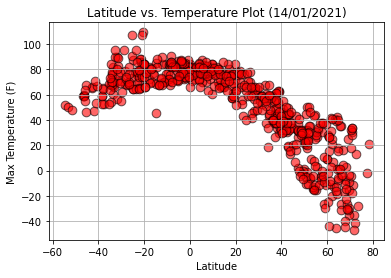

In [25]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max temp'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs. Temperature Plot (14/01/2021)')
plt.grid()
plt.savefig("Output/LatVsTemp.png")
plt.show()


### OBSERVATION: The above plot analyses the relationship between a city's latitude with its maximum observed temperature. The plot shows a negative association about the equator (0-degree lat) i.e. as we move away from the equator, both towards north pole (+ 90 degree lat) and south pole (- 90 degree lat), the maximum temperature starts decreasing with increase in latitude position.

## Latitude vs. Humidity Plot

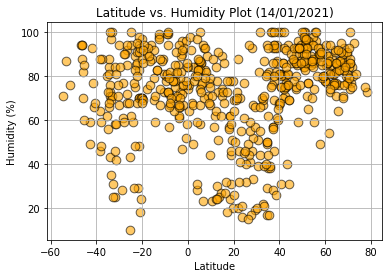

In [11]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker ="o",c="orange",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Latitude vs. Humidity Plot (14/01/2021)')
plt.grid()
plt.savefig("Output/LatVsHumidity.png")
plt.show()

### OBSERVATION: The above plot analyses the relationship between a city's latitude with it's humidity levels. The plot does not show any general drift (either upward or downward) while considering the data points.  Hence the latitude has no effect on the city's humidity. 

## Latitude vs. Cloudiness Plot

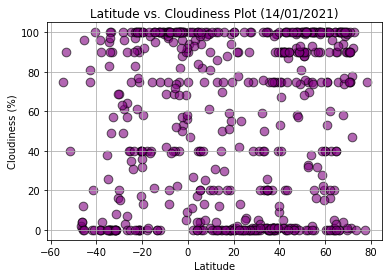

In [12]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker ="o",c="purple",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Latitude vs. Cloudiness Plot (14/01/2021)')
plt.grid()
plt.savefig("Output/LatVsCloudiness.png")
plt.show()

### OBSERVATION: The above plot demonstrates the relationship between a city's latitude and it's cloudiness expressed in percentage. The plot does not show any trends at all. Hence there is no apparent correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

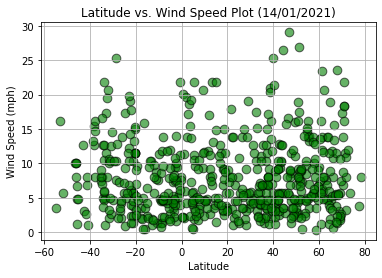

In [13]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker ="o",c="green",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Latitude vs. Wind Speed Plot (14/01/2021)')
plt.grid()
plt.savefig("Output/LatVsWind_Speed.png")
plt.show()

### OBSERVATION: The above plot displays the relationship between a city's latitude with its wind speed (in mph). The plot does not show any particular trend and hence it can be concluded that, the change in latitude position has no effect on the city's wind speed. However, the wind speeds in majority of the cities lie in the lower half of the graph indicating low wind speeds irrespective of the latitude position.

## Linear Regression

In [14]:
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,59.14,51,5,5.79,MX,1610605952
1,Atuona,-9.8000,-139.0333,77.54,78,42,11.34,PF,1610605822
2,Sirpur,19.4833,79.6000,84.40,20,0,3.85,IN,1610605954
3,Codrington,-38.2667,141.9667,58.91,64,96,15.48,AU,1610605955
4,Bengkulu,-3.8004,102.2655,84.92,61,100,7.25,ID,1610605957
...,...,...,...,...,...,...,...,...,...
570,Tigil',57.8000,158.6667,-0.62,90,99,6.22,RU,1610607364
571,Vredendal,-31.6683,18.5012,80.29,46,0,3.24,ZA,1610607365
572,Kolpashevo,58.3131,82.9089,-4.58,91,100,10.56,RU,1610607366
573,Yeppoon,-23.1333,150.7333,86.00,48,0,10.36,AU,1610607367


In [15]:
NH_data=clean_city_data.loc[clean_city_data['Lat']>=0,:]
len(NH_data)

384

In [16]:
SH_data=clean_city_data.loc[clean_city_data['Lat']<0,:]
len(SH_data)

191

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7443084708804181


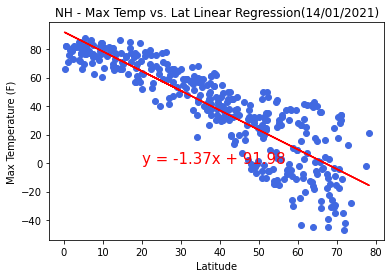

In [36]:
x_values=NH_data['Lat']
y_values=NH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('NH - Max Temp vs. Lat Linear Regression(14/01/2021)')
plt.savefig("Output/NH_LatVsTemp.png")
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.25364838404768


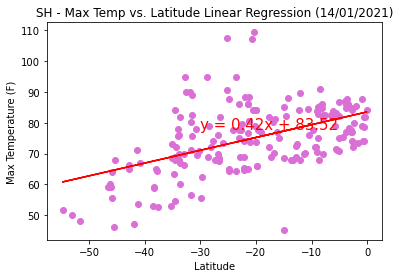

In [37]:
x_values=SH_data['Lat']
y_values=SH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,78),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('SH - Max Temp vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/SH_LatVsTemp.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

### OBSERVATION: The linear regression model between latitude position and maximum temperature for the northern hemisphere, has a R-value of >0.7 indicating a strong correlation, whereas that for southern hemisphere has a R-value of <0.3, thus indicating a weak correlation.                                                                                          Hence it can be concluded that as we move away from the equator towards the north pole, it gets cooler. However, such a conclusion cannot be made very clearly for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.146586238878039


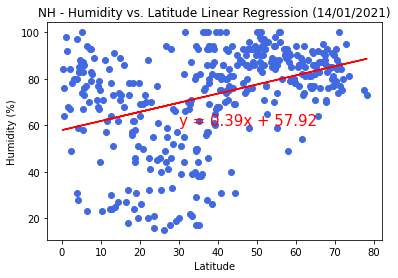

In [44]:
x_values=NH_data['Lat']
y_values=NH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('NH - Humidity vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/NH_LatVsHumidity.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.019961792465306247


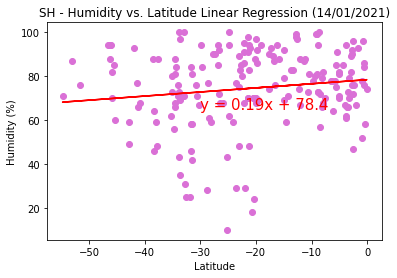

In [39]:
x_values=SH_data['Lat']
y_values=SH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('SH - Humidity vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/SH_LatVsHumidity.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

### OBSERVATION: The linear regression model between latitude position and humidity (%) for both the northern and southern hemispheres, demonstrate a very weak correlation based on their R-values. There is a slight trend though, demonstrating an increase in humidity levels as we move towards the north pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04499706009915749


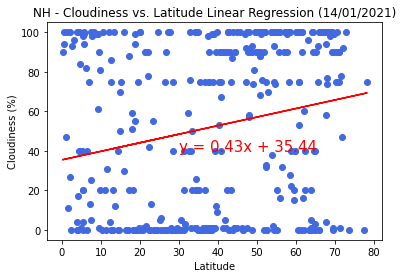

In [40]:
x_values=NH_data['Lat']
y_values=NH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('NH - Cloudiness vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/NH_LatVsCloudiness.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16649332834902833


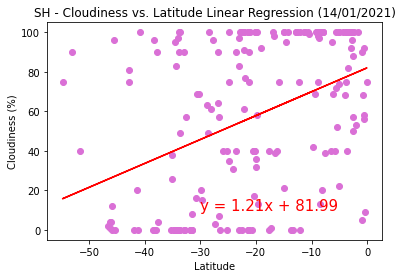

In [41]:
x_values=SH_data['Lat']
y_values=SH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('SH - Cloudiness vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/SH_LatVsCloudiness.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

### OBSERVATION: The linear regression model between latitude position and cloudiness (%) for the northern and  hemispheres, show a very weak correlation with the R-values >0.3. Hence the cloudiness does not seem to be greatly affected by the latitude position especially in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0026756405568550985


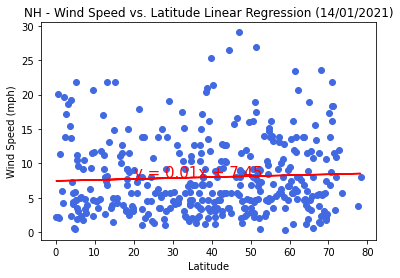

In [42]:
x_values=NH_data['Lat']
y_values=NH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('NH - Wind Speed vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/NH_LatVsWindSpeed.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03458784897483637


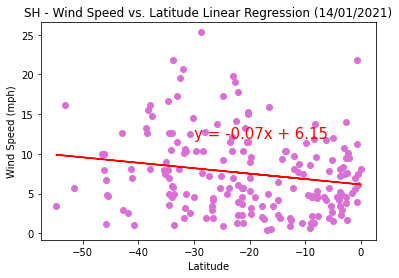

In [43]:
x_values=SH_data['Lat']
y_values=SH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('SH - Wind Speed vs. Latitude Linear Regression (14/01/2021)')
plt.savefig("Output/SH_LatVsWindSpeed.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

### OBSERVATION: While there is no correlation between latitude and wind speed for either hemispheres. Hence, wind speed does not seem to be hugely affected based on latitude position.